In [1]:
import sys, os
sys.path.append("/Users/zhouji/Documents/gempy")
import gempy as gp
import numpy as np

In [2]:
import pymc3 as pm
%matplotlib inline

import matplotlib.pyplot as plt

## Create a simple model with Horizontal strata

Three layers model - from Jan's model. 6 surface points, 2 orien points

In [20]:
geo_model = gp.create_model('Tristrata')
gp.init_data(geo_model,[0,1000,0,1000,0,1000],resolution = [10,1,10],
                         path_o=os.pardir+"/My_model/input_data/model1_orientations.csv",
                         path_i=os.pardir+"/My_model/input_data/model1_surface_points.csv")



Active grids: ['regular']


Tristrata  2019-08-21 12:14

In [21]:
geo_model.get_data()

X    Y    Z     X_r     Y_r     Z_r surface  \
surface_points 0   100  200  600  0.2501  0.3126  0.5626   rock2   
               1   500  200  600  0.5001  0.3126  0.5626   rock2   
               2   900  200  600  0.7501  0.3126  0.5626   rock2   
               3   100  800  600  0.2501  0.6876  0.5626   rock2   
               4   500  800  600  0.5001  0.6876  0.5626   rock2   
               5   900  800  600  0.7501  0.6876  0.5626   rock2   
               6   100  200  400  0.2501  0.3126  0.4376   rock1   
               7   500  200  400  0.5001  0.3126  0.4376   rock1   
               8   900  200  400  0.7501  0.3126  0.4376   rock1   
               9   100  800  400  0.2501  0.6876  0.4376   rock1   
               10  500  800  400  0.5001  0.6876  0.4376   rock1   
               11  900  800  400  0.7501  0.6876  0.4376   rock1   
orientations   0   500  500  600  0.5001  0.5001  0.5626   rock2   
               1   500  500  400  0.5001  0.5001  0.4376   rock1   

                           series  id  order_series        smooth  \
surface_points 0   Default series   1             1  1.000000e-08   
               1   Default series   1             1  1.000000e-08   
               2   Default series   1             1  1.000000e-08   
               3   Default series   1             1  1.000000e-08   
               4   Default series   1             1  1.000000e-08   
               5   Default series   1             1  1.000000e-08   
               6   Default series   2             1  1.000000e-08   
               7   Default series   2             1  1.000000e-08   
               8   Default series   2             1  1.000000e-08   
               9   Default series   2             1  1.000000e-08   
               10  Default series   2             1  1.000000e-08   
               11  Default series   2             1  1.000000e-08   
orientations   0   Default series   1             1  1.000000e-02   
               1   Default series   2             1  1.000000e-02   

                            G_x           G_y  G_z  dip  azimuth  polarity  
surface_points 0            NaN           NaN  NaN  NaN      NaN       NaN  
               1            NaN           NaN  NaN  NaN      NaN       NaN  
               2            NaN           NaN  NaN  NaN      NaN       NaN  
               3            NaN           NaN  NaN  NaN      NaN       NaN  
               4            NaN           NaN  NaN  NaN      NaN       NaN  
               5            NaN           NaN  NaN  NaN      NaN       NaN  
               6            NaN           NaN  NaN  NaN      NaN       NaN  
               7            NaN           NaN  NaN  NaN      NaN       NaN  
               8            NaN           NaN  NaN  NaN      NaN       NaN  
               9            NaN           NaN  NaN  NaN      NaN       NaN  
               10           NaN           NaN  NaN  NaN      NaN       NaN  
               11           NaN           NaN  NaN  NaN      NaN       NaN  
orientations   0   1.000000e-12  1.000000e-12  1.0  0.0     90.0       1.0  
               1   1.000000e-12  1.000000e-12  1.0  0.0     90.0       1.0

In [22]:
geo_model.delete_surface_points([1,3,4,5])
geo_model.modify_surface_points([0, 2], Y=500, Z=[500, 600])

,X,Y,Z,X_r,Y_r,Z_r,surface,series,id,order_series,smooth
0,100,500,500,0.2501,0.5001,0.5001,rock2,Default series,1,1,1.000000e-08
2,900,500,600,0.7501,0.5001,0.5626,rock2,Default series,1,1,1.000000e-08
6,100,200,400,0.2501,0.3126,0.4376,rock1,Default series,2,1,1.000000e-08
7,500,200,400,0.5001,0.3126,0.4376,rock1,Default series,2,1,1.000000e-08
8,900,200,400,0.7501,0.3126,0.4376,rock1,Default series,2,1,1.000000e-08
9,100,800,400,0.2501,0.6876,0.4376,rock1,Default series,2,1,1.000000e-08
10,500,800,400,0.5001,0.6876,0.4376,rock1,Default series,2,1,1.000000e-08
11,900,800,400,0.7501,0.6876,0.4376,rock1,Default series,2,1,1.000000e-08


In [23]:
geo_model.delete_surface_points([7,9,10,11])
geo_model.modify_surface_points([6, 8], Z=[300, 400])

,X,Y,Z,X_r,Y_r,Z_r,surface,series,id,order_series,smooth
0,100,500,500,0.2501,0.59385,0.53135,rock2,Default series,1,1,1.000000e-08
2,900,500,600,0.7501,0.59385,0.59385,rock2,Default series,1,1,1.000000e-08
6,100,200,300,0.2501,0.40635,0.40635,rock1,Default series,2,1,1.000000e-08
8,900,200,400,0.7501,0.40635,0.46885,rock1,Default series,2,1,1.000000e-08


In [24]:
geo_model.modify_orientations([0,1], dip = 350)

,X,Y,Z,X_r,Y_r,Z_r,G_x,G_y,G_z,dip,azimuth,polarity,surface,series,id,order_series,smooth
0,500,500,600,0.5001,0.59385,0.59385,-0.173648,9.999894e-13,0.984808,350,90,1,rock2,Default series,1,1,0.01
1,500,500,400,0.5001,0.59385,0.46885,-0.173648,9.999894e-13,0.984808,350,90,1,rock1,Default series,2,1,0.01


 Setting and ordering the units and series

In [25]:
gp.map_series_to_surfaces(geo_model,{"Start_Series":('rock2','rock1'),"Basement_Series":('basement')})

,surface,series,order_surfaces,isBasement,color,id
0,rock2,Start_Series,1,False,#015482,1
1,rock1,Start_Series,2,False,#9f0052,2
2,basement,Basement_Series,1,True,#ffbe00,3


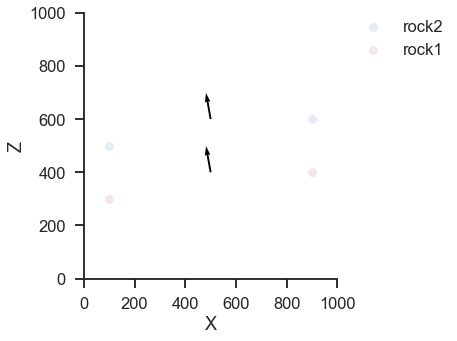

In [26]:
gp.plot.plot_data(geo_model,direction="y",scatter_kws={'alpha': 0.1})

In [22]:
# gp.set_interpolation_data(geo_model, theano_optimizer='fast_compile',
#                           verbose=['compare'],gradient=True)

gp.set_interpolation_data(geo_model, theano_optimizer='fast_compile',
                          verbose=['compare'])

Compiling theano function...
Compilation Done!


In [23]:
gp.compute_model(geo_model)

n_surface_0 __str__ = [[-1.]]
a __str__ = 1.6398714907788159
n_surface_1 __str__ = [[1.]]
b __str__ = 1.0130715225016305
drift[slice_init:slice_init+1][0] __str__ = [[1.]]
n_surface_0 __str__ = [[2.]]
a __str__ = 1.0130715225016305
n_surface_1 __str__ = [[2.]]
b __str__ = 0.7650958514558864
drift[slice_init:slice_init+1][0] __str__ = [[2.]]
n_surface_0 __str__ = [[3.]]
a __str__ = 0.7650958514558864
n_surface_1 __str__ = [[-1.]]
b __str__ = 0.2576920539133758
drift[slice_init:slice_init+1][0] __str__ = [[3.]]


/Users/zhouji/Documents/gempy/gempy/core/solution.py:253: UserWarning: Attribute error. Using non masked marching cubesmarching_cubes_lewiner() got an unexpected keyword argument 'mask'
  warnings.warn('Attribute error. Using non masked marching cubes' + str(e))



Lithology ids 
  [3. 3. 3. ... 1. 1. 1.] 

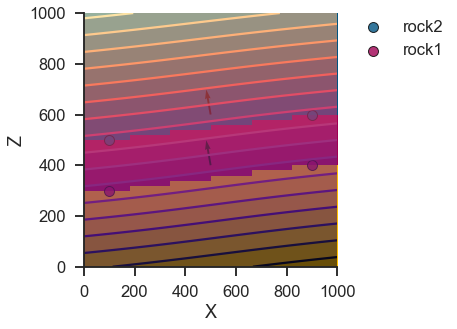

In [25]:
gp.plot.plot_section(geo_model, 0, show_data=True)
gp.plot.plot_scalar_field(geo_model, 0, plot_data=False)

In [26]:
interp_data = gp.compute_model(geo_model)

n_surface_0 __str__ = [[-1.]]
a __str__ = 1.6398714907788159
n_surface_1 __str__ = [[1.]]
b __str__ = 1.0130715225016305
drift[slice_init:slice_init+1][0] __str__ = [[1.]]
n_surface_0 __str__ = [[2.]]
a __str__ = 1.0130715225016305
n_surface_1 __str__ = [[2.]]
b __str__ = 0.7650958514558864
drift[slice_init:slice_init+1][0] __str__ = [[2.]]
n_surface_0 __str__ = [[3.]]
a __str__ = 0.7650958514558864
n_surface_1 __str__ = [[-1.]]
b __str__ = 0.2576920539133758
drift[slice_init:slice_init+1][0] __str__ = [[3.]]


/Users/zhouji/Documents/gempy/gempy/core/solution.py:253: UserWarning: Attribute error. Using non masked marching cubesmarching_cubes_lewiner() got an unexpected keyword argument 'mask'
  warnings.warn('Attribute error. Using non masked marching cubes' + str(e))


## Plot Surfaces

<div class="alert alert-warning">
    only works in Master branch so far
    </div>

In [27]:
geo_model.solutions.vertices

[array([[  0.        ,   0.        , 483.27869415],
        [  0.        ,  20.        , 483.12770844],
        [ 20.        ,   0.        , 485.26477814],
        ...,
        [980.        , 940.        , 596.17477417],
        [980.        , 960.        , 596.01875305],
        [980.        , 980.        , 595.86025238]]),
 array([[  0.        ,   0.        , 282.62435913],
        [  0.        ,  20.        , 282.45475769],
        [ 20.        ,   0.        , 284.60481644],
        ...,
        [980.        , 940.        , 396.94282532],
        [980.        , 960.        , 396.7514801 ],
        [980.        , 980.        , 396.55895233]])]

In [28]:
ver, sim = gp.get_surfaces(interp_data)

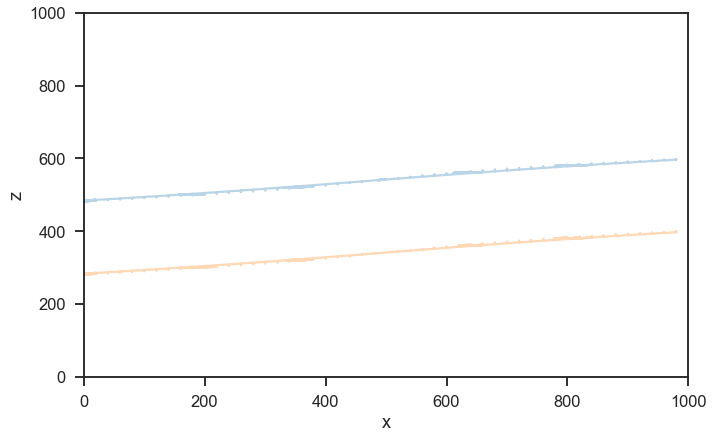

In [29]:
def get_figsize(scale, textwidth=522, ratio=None):                      # Get this from LaTeX using \the\textwidth
    """Source: http://bkanuka.com/articles/native-latex-plots/"""
    inches_per_pt = 1.0 / 72.27                             # Convert pt to inch
    if ratio == None:
        ratio = (np.sqrt(5.0)-1.0)/2.0                    # Aesthetic ratio (you could change this)
    fig_width = textwidth * inches_per_pt * scale           # width in inches
    fig_height = fig_width * ratio                    # height in inches
    fig_size = [fig_width, fig_height]
    return fig_size


fig = plt.figure(figsize=get_figsize(1.5))
ax = plt.subplot()

for i in range(0,np.shape(ver)[0]):
    plt.plot(ver[i][:,0],ver[i][:,2],'-',alpha = 0.3)

plt.ylim(0,1000)
plt.xlim(0,1000)

ax.set_xlabel("x")

plt.ylabel("z")

plt.show()



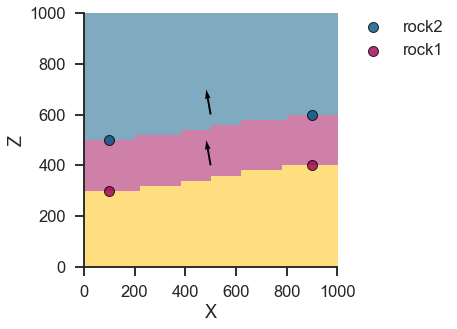

In [30]:
%matplotlib inline
gp.plot.plot_section(geo_model, cell_number=25,
                         direction='y', show_data=True,alpha= 0.5)

<div class="alert alert-warning">
    In hmc_dev Branch
    </div>

In [27]:
import theano
import theano.tensor as T
import pymc3 as pm
theano.config.optimizer_including

from io import StringIO
import sys

import warnings
warnings.filterwarnings("ignore")

In [28]:
gp.set_interpolation_data(geo_model, theano_optimizer='fast_compile',
                          verbose=['compare'],gradient=True)
geo_model.interpolator.theano_graph.sig_slope.set_value(np.array(50, dtype='float32'))

Compiling theano function...
Compilation Done!


Gradient
--------

In [36]:
respect = geo_model.interpolator.theano_graph.input_parameters_loop[4]
th_f_g = theano.function(geo_model.interpolator.theano_graph.input_parameters_loop,
                         T.grad((geo_model.interpolator.theano_graph.compute_series()[0][-1]).sum(),                    
                                respect),
                          # mode=NanGuardMode(nan_is_error=True),
                         on_unused_input='ignore')
print("Respect: " + str(respect))

Respect: All the surface_points points at once


In [38]:
grad = th_f_g(*geo_model.interpolator.get_python_input_block())

n_surface_0 __str__ = [[0.]]
a __str__ = 0.0
n_surface_1 __str__ = [[1.]]
b __str__ = 1.0130714
drift[slice_init:slice_init+1][0] __str__ = [[1.]]
n_surface_0 __str__ = [[2.]]
a __str__ = 1.0130714
n_surface_1 __str__ = [[2.]]
b __str__ = 0.7650956
drift[slice_init:slice_init+1][0] __str__ = [[2.]]
n_surface_0 __str__ = [[3.]]
a __str__ = 0.7650956
n_surface_1 __str__ = [[0.]]
b __str__ = 0.0
drift[slice_init:slice_init+1][0] __str__ = [[3.]]
n_surface_0 __str__ = [[0.]]
a __str__ = 0.0
n_surface_1 __str__ = [[1.]]
b __str__ = 1.0130714
drift[slice_init:slice_init+1][0] __str__ = [[1.]]
n_surface_0 __str__ = [[2.]]
a __str__ = 1.0130714
n_surface_1 __str__ = [[2.]]
b __str__ = 0.7650956
drift[slice_init:slice_init+1][0] __str__ = [[2.]]
n_surface_0 __str__ = [[3.]]
a __str__ = 0.7650956
n_surface_1 __str__ = [[0.]]
b __str__ = 0.0
drift[slice_init:slice_init+1][0] __str__ = [[3.]]
n_surface_0 __str__ = [[3.]]
a __str__ = 0.7650956
n_surface_1 __str__ = [[0.]]
b __str__ = 0.0
drift[slic

In [39]:
grad

array([[-3.8450298 , -5.266065  , 74.451614  ],
       [-3.4565315 ,  5.148286  , 70.907616  ],
       [-7.161803  ,  0.91625845, 70.47062   ],
       [-7.5250616 , -1.0334634 , 73.52496   ]], dtype=float32)

Jacobian
--------


In [29]:
respect = geo_model.interpolator.theano_graph.input_parameters_loop[4]
th_f_j = theano.function(geo_model.interpolator.theano_graph.input_parameters_loop,
                         T.jacobian((geo_model.interpolator.theano_graph.compute_series()[0][-1][:100]), 
                                respect),
#                           mode=NanGuardMode(nan_is_error=True),
                         on_unused_input='ignore')
print("Respect: " + str(respect))

Respect: All the surface_points points at once


In [30]:
jac = th_f_j(*geo_model.interpolator.get_python_input_block())

n_surface_0 __str__ = [[0.]]
a __str__ = 0.0
n_surface_1 __str__ = [[1.]]
b __str__ = 1.0130714
drift[slice_init:slice_init+1][0] __str__ = [[1.]]
n_surface_0 __str__ = [[2.]]
a __str__ = 1.0130714
n_surface_1 __str__ = [[2.]]
b __str__ = 0.7650956
drift[slice_init:slice_init+1][0] __str__ = [[2.]]
n_surface_0 __str__ = [[3.]]
a __str__ = 0.7650956
n_surface_1 __str__ = [[0.]]
b __str__ = 0.0
drift[slice_init:slice_init+1][0] __str__ = [[3.]]
n_surface_0 __str__ = [[0.]]
a __str__ = 0.0
n_surface_1 __str__ = [[1.]]
b __str__ = 1.0130714
drift[slice_init:slice_init+1][0] __str__ = [[1.]]
n_surface_0 __str__ = [[2.]]
a __str__ = 1.0130714
n_surface_1 __str__ = [[2.]]
b __str__ = 0.7650956
drift[slice_init:slice_init+1][0] __str__ = [[2.]]
n_surface_0 __str__ = [[3.]]
a __str__ = 0.7650956
n_surface_1 __str__ = [[0.]]
b __str__ = 0.0
drift[slice_init:slice_init+1][0] __str__ = [[3.]]
n_surface_0 __str__ = [[0.]]
a __str__ = 0.0
n_surface_1 __str__ = [[1.]]
b __str__ = 1.0130714
drift[slic

n_surface_0 __str__ = [[0.]]
a __str__ = 0.0
n_surface_1 __str__ = [[1.]]
b __str__ = 1.0130714
drift[slice_init:slice_init+1][0] __str__ = [[1.]]
n_surface_0 __str__ = [[2.]]
a __str__ = 1.0130714
n_surface_1 __str__ = [[2.]]
b __str__ = 0.7650956
drift[slice_init:slice_init+1][0] __str__ = [[2.]]
n_surface_0 __str__ = [[3.]]
a __str__ = 0.7650956
n_surface_1 __str__ = [[0.]]
b __str__ = 0.0
drift[slice_init:slice_init+1][0] __str__ = [[3.]]
n_surface_0 __str__ = [[0.]]
a __str__ = 0.0
n_surface_1 __str__ = [[1.]]
b __str__ = 1.0130714
drift[slice_init:slice_init+1][0] __str__ = [[1.]]
n_surface_0 __str__ = [[2.]]
a __str__ = 1.0130714
n_surface_1 __str__ = [[2.]]
b __str__ = 0.7650956
drift[slice_init:slice_init+1][0] __str__ = [[2.]]
n_surface_0 __str__ = [[3.]]
a __str__ = 0.7650956
n_surface_1 __str__ = [[0.]]
b __str__ = 0.0
drift[slice_init:slice_init+1][0] __str__ = [[3.]]
n_surface_0 __str__ = [[3.]]
a __str__ = 0.7650956
n_surface_1 __str__ = [[0.]]
b __str__ = 0.0
drift[slic

n_surface_0 __str__ = [[0.]]
a __str__ = 0.0
n_surface_1 __str__ = [[1.]]
b __str__ = 1.0130714
drift[slice_init:slice_init+1][0] __str__ = [[1.]]
n_surface_0 __str__ = [[2.]]
a __str__ = 1.0130714
n_surface_1 __str__ = [[2.]]
b __str__ = 0.7650956
drift[slice_init:slice_init+1][0] __str__ = [[2.]]
n_surface_0 __str__ = [[3.]]
a __str__ = 0.7650956
n_surface_1 __str__ = [[0.]]
b __str__ = 0.0
drift[slice_init:slice_init+1][0] __str__ = [[3.]]
n_surface_0 __str__ = [[0.]]
a __str__ = 0.0
n_surface_1 __str__ = [[1.]]
b __str__ = 1.0130714
drift[slice_init:slice_init+1][0] __str__ = [[1.]]
n_surface_0 __str__ = [[2.]]
a __str__ = 1.0130714
n_surface_1 __str__ = [[2.]]
b __str__ = 0.7650956
drift[slice_init:slice_init+1][0] __str__ = [[2.]]
n_surface_0 __str__ = [[3.]]
a __str__ = 0.7650956
n_surface_1 __str__ = [[0.]]
b __str__ = 0.0
drift[slice_init:slice_init+1][0] __str__ = [[3.]]
n_surface_0 __str__ = [[3.]]
a __str__ = 0.7650956
n_surface_1 __str__ = [[0.]]
b __str__ = 0.0
drift[slic

b __str__ = 0.0
drift[slice_init:slice_init+1][0] __str__ = [[3.]]
n_surface_0 __str__ = [[3.]]
a __str__ = 0.7650956
n_surface_1 __str__ = [[0.]]
b __str__ = 0.0
drift[slice_init:slice_init+1][0] __str__ = [[3.]]
n_surface_0 __str__ = [[2.]]
a __str__ = 1.0130714
n_surface_1 __str__ = [[2.]]
b __str__ = 0.7650956
drift[slice_init:slice_init+1][0] __str__ = [[2.]]
n_surface_0 __str__ = [[0.]]
a __str__ = 0.0
n_surface_1 __str__ = [[1.]]
b __str__ = 1.0130714
drift[slice_init:slice_init+1][0] __str__ = [[1.]]
n_surface_0 __str__ = [[0.]]
a __str__ = 0.0
n_surface_1 __str__ = [[1.]]
b __str__ = 1.0130714
drift[slice_init:slice_init+1][0] __str__ = [[1.]]
n_surface_0 __str__ = [[2.]]
a __str__ = 1.0130714
n_surface_1 __str__ = [[2.]]
b __str__ = 0.7650956
drift[slice_init:slice_init+1][0] __str__ = [[2.]]
n_surface_0 __str__ = [[3.]]
a __str__ = 0.7650956
n_surface_1 __str__ = [[0.]]
b __str__ = 0.0
drift[slice_init:slice_init+1][0] __str__ = [[3.]]
n_surface_0 __str__ = [[0.]]
a __str__ 

n_surface_0 __str__ = [[0.]]
a __str__ = 0.0
n_surface_1 __str__ = [[1.]]
b __str__ = 1.0130714
drift[slice_init:slice_init+1][0] __str__ = [[1.]]
n_surface_0 __str__ = [[2.]]
a __str__ = 1.0130714
n_surface_1 __str__ = [[2.]]
b __str__ = 0.7650956
drift[slice_init:slice_init+1][0] __str__ = [[2.]]
n_surface_0 __str__ = [[3.]]
a __str__ = 0.7650956
n_surface_1 __str__ = [[0.]]
b __str__ = 0.0
drift[slice_init:slice_init+1][0] __str__ = [[3.]]
n_surface_0 __str__ = [[0.]]
a __str__ = 0.0
n_surface_1 __str__ = [[1.]]
b __str__ = 1.0130714
drift[slice_init:slice_init+1][0] __str__ = [[1.]]
n_surface_0 __str__ = [[2.]]
a __str__ = 1.0130714
n_surface_1 __str__ = [[2.]]
b __str__ = 0.7650956
drift[slice_init:slice_init+1][0] __str__ = [[2.]]
n_surface_0 __str__ = [[3.]]
a __str__ = 0.7650956
n_surface_1 __str__ = [[0.]]
b __str__ = 0.0
drift[slice_init:slice_init+1][0] __str__ = [[3.]]
n_surface_0 __str__ = [[3.]]
a __str__ = 0.7650956
n_surface_1 __str__ = [[0.]]
b __str__ = 0.0
drift[slic

n_surface_0 __str__ = [[3.]]
a __str__ = 0.7650956
n_surface_1 __str__ = [[0.]]
b __str__ = 0.0
drift[slice_init:slice_init+1][0] __str__ = [[3.]]
n_surface_0 __str__ = [[3.]]
a __str__ = 0.7650956
n_surface_1 __str__ = [[0.]]
b __str__ = 0.0
drift[slice_init:slice_init+1][0] __str__ = [[3.]]
n_surface_0 __str__ = [[2.]]
a __str__ = 1.0130714
n_surface_1 __str__ = [[2.]]
b __str__ = 0.7650956
drift[slice_init:slice_init+1][0] __str__ = [[2.]]
n_surface_0 __str__ = [[0.]]
a __str__ = 0.0
n_surface_1 __str__ = [[1.]]
b __str__ = 1.0130714
drift[slice_init:slice_init+1][0] __str__ = [[1.]]
n_surface_0 __str__ = [[0.]]
a __str__ = 0.0
n_surface_1 __str__ = [[1.]]
b __str__ = 1.0130714
drift[slice_init:slice_init+1][0] __str__ = [[1.]]
n_surface_0 __str__ = [[2.]]
a __str__ = 1.0130714
n_surface_1 __str__ = [[2.]]
b __str__ = 0.7650956
drift[slice_init:slice_init+1][0] __str__ = [[2.]]
n_surface_0 __str__ = [[3.]]
a __str__ = 0.7650956
n_surface_1 __str__ = [[0.]]
b __str__ = 0.0
drift[slic

n_surface_0 __str__ = [[0.]]
a __str__ = 0.0
n_surface_1 __str__ = [[1.]]
b __str__ = 1.0130714
drift[slice_init:slice_init+1][0] __str__ = [[1.]]
n_surface_0 __str__ = [[2.]]
a __str__ = 1.0130714
n_surface_1 __str__ = [[2.]]
b __str__ = 0.7650956
drift[slice_init:slice_init+1][0] __str__ = [[2.]]
n_surface_0 __str__ = [[3.]]
a __str__ = 0.7650956
n_surface_1 __str__ = [[0.]]
b __str__ = 0.0
drift[slice_init:slice_init+1][0] __str__ = [[3.]]
n_surface_0 __str__ = [[0.]]
a __str__ = 0.0
n_surface_1 __str__ = [[1.]]
b __str__ = 1.0130714
drift[slice_init:slice_init+1][0] __str__ = [[1.]]
n_surface_0 __str__ = [[2.]]
a __str__ = 1.0130714
n_surface_1 __str__ = [[2.]]
b __str__ = 0.7650956
drift[slice_init:slice_init+1][0] __str__ = [[2.]]
n_surface_0 __str__ = [[3.]]
a __str__ = 0.7650956
n_surface_1 __str__ = [[0.]]
b __str__ = 0.0
drift[slice_init:slice_init+1][0] __str__ = [[3.]]
n_surface_0 __str__ = [[3.]]
a __str__ = 0.7650956
n_surface_1 __str__ = [[0.]]
b __str__ = 0.0
drift[slic

n_surface_1 __str__ = [[0.]]
b __str__ = 0.0
drift[slice_init:slice_init+1][0] __str__ = [[3.]]
n_surface_0 __str__ = [[0.]]
a __str__ = 0.0
n_surface_1 __str__ = [[1.]]
b __str__ = 1.0130714
drift[slice_init:slice_init+1][0] __str__ = [[1.]]
n_surface_0 __str__ = [[2.]]
a __str__ = 1.0130714
n_surface_1 __str__ = [[2.]]
b __str__ = 0.7650956
drift[slice_init:slice_init+1][0] __str__ = [[2.]]
n_surface_0 __str__ = [[3.]]
a __str__ = 0.7650956
n_surface_1 __str__ = [[0.]]
b __str__ = 0.0
drift[slice_init:slice_init+1][0] __str__ = [[3.]]
n_surface_0 __str__ = [[3.]]
a __str__ = 0.7650956
n_surface_1 __str__ = [[0.]]
b __str__ = 0.0
drift[slice_init:slice_init+1][0] __str__ = [[3.]]
n_surface_0 __str__ = [[2.]]
a __str__ = 1.0130714
n_surface_1 __str__ = [[2.]]
b __str__ = 0.7650956
drift[slice_init:slice_init+1][0] __str__ = [[2.]]
n_surface_0 __str__ = [[0.]]
a __str__ = 0.0
n_surface_1 __str__ = [[1.]]
b __str__ = 1.0130714
drift[slice_init:slice_init+1][0] __str__ = [[1.]]
n_surface_

n_surface_1 __str__ = [[2.]]
b __str__ = 0.7650956
drift[slice_init:slice_init+1][0] __str__ = [[2.]]
n_surface_0 __str__ = [[0.]]
a __str__ = 0.0
n_surface_1 __str__ = [[1.]]
b __str__ = 1.0130714
drift[slice_init:slice_init+1][0] __str__ = [[1.]]
n_surface_0 __str__ = [[0.]]
a __str__ = 0.0
n_surface_1 __str__ = [[1.]]
b __str__ = 1.0130714
drift[slice_init:slice_init+1][0] __str__ = [[1.]]
n_surface_0 __str__ = [[2.]]
a __str__ = 1.0130714
n_surface_1 __str__ = [[2.]]
b __str__ = 0.7650956
drift[slice_init:slice_init+1][0] __str__ = [[2.]]
n_surface_0 __str__ = [[3.]]
a __str__ = 0.7650956
n_surface_1 __str__ = [[0.]]
b __str__ = 0.0
drift[slice_init:slice_init+1][0] __str__ = [[3.]]
n_surface_0 __str__ = [[0.]]
a __str__ = 0.0
n_surface_1 __str__ = [[1.]]
b __str__ = 1.0130714
drift[slice_init:slice_init+1][0] __str__ = [[1.]]
n_surface_0 __str__ = [[2.]]
a __str__ = 1.0130714
n_surface_1 __str__ = [[2.]]
b __str__ = 0.7650956
drift[slice_init:slice_init+1][0] __str__ = [[2.]]
n_su

n_surface_0 __str__ = [[0.]]
a __str__ = 0.0
n_surface_1 __str__ = [[1.]]
b __str__ = 1.0130714
drift[slice_init:slice_init+1][0] __str__ = [[1.]]
n_surface_0 __str__ = [[2.]]
a __str__ = 1.0130714
n_surface_1 __str__ = [[2.]]
b __str__ = 0.7650956
drift[slice_init:slice_init+1][0] __str__ = [[2.]]
n_surface_0 __str__ = [[3.]]
a __str__ = 0.7650956
n_surface_1 __str__ = [[0.]]
b __str__ = 0.0
drift[slice_init:slice_init+1][0] __str__ = [[3.]]
n_surface_0 __str__ = [[3.]]
a __str__ = 0.7650956
n_surface_1 __str__ = [[0.]]
b __str__ = 0.0
drift[slice_init:slice_init+1][0] __str__ = [[3.]]
n_surface_0 __str__ = [[2.]]
a __str__ = 1.0130714
n_surface_1 __str__ = [[2.]]
b __str__ = 0.7650956
drift[slice_init:slice_init+1][0] __str__ = [[2.]]
n_surface_0 __str__ = [[0.]]
a __str__ = 0.0
n_surface_1 __str__ = [[1.]]
b __str__ = 1.0130714
drift[slice_init:slice_init+1][0] __str__ = [[1.]]
n_surface_0 __str__ = [[0.]]
a __str__ = 0.0
n_surface_1 __str__ = [[1.]]
b __str__ = 1.0130714
drift[slic

n_surface_0 __str__ = [[3.]]
a __str__ = 0.7650956
n_surface_1 __str__ = [[0.]]
b __str__ = 0.0
drift[slice_init:slice_init+1][0] __str__ = [[3.]]
n_surface_0 __str__ = [[2.]]
a __str__ = 1.0130714
n_surface_1 __str__ = [[2.]]
b __str__ = 0.7650956
drift[slice_init:slice_init+1][0] __str__ = [[2.]]
n_surface_0 __str__ = [[0.]]
a __str__ = 0.0
n_surface_1 __str__ = [[1.]]
b __str__ = 1.0130714
drift[slice_init:slice_init+1][0] __str__ = [[1.]]
n_surface_0 __str__ = [[0.]]
a __str__ = 0.0
n_surface_1 __str__ = [[1.]]
b __str__ = 1.0130714
drift[slice_init:slice_init+1][0] __str__ = [[1.]]
n_surface_0 __str__ = [[2.]]
a __str__ = 1.0130714
n_surface_1 __str__ = [[2.]]
b __str__ = 0.7650956
drift[slice_init:slice_init+1][0] __str__ = [[2.]]
n_surface_0 __str__ = [[3.]]
a __str__ = 0.7650956
n_surface_1 __str__ = [[0.]]
b __str__ = 0.0
drift[slice_init:slice_init+1][0] __str__ = [[3.]]
n_surface_0 __str__ = [[0.]]
a __str__ = 0.0
n_surface_1 __str__ = [[1.]]
b __str__ = 1.0130714
drift[slic

n_surface_0 __str__ = [[0.]]
a __str__ = 0.0
n_surface_1 __str__ = [[1.]]
b __str__ = 1.0130714
drift[slice_init:slice_init+1][0] __str__ = [[1.]]
n_surface_0 __str__ = [[2.]]
a __str__ = 1.0130714
n_surface_1 __str__ = [[2.]]
b __str__ = 0.7650956
drift[slice_init:slice_init+1][0] __str__ = [[2.]]
n_surface_0 __str__ = [[3.]]
a __str__ = 0.7650956
n_surface_1 __str__ = [[0.]]
b __str__ = 0.0
drift[slice_init:slice_init+1][0] __str__ = [[3.]]
n_surface_0 __str__ = [[0.]]
a __str__ = 0.0
n_surface_1 __str__ = [[1.]]
b __str__ = 1.0130714
drift[slice_init:slice_init+1][0] __str__ = [[1.]]
n_surface_0 __str__ = [[2.]]
a __str__ = 1.0130714
n_surface_1 __str__ = [[2.]]
b __str__ = 0.7650956
drift[slice_init:slice_init+1][0] __str__ = [[2.]]
n_surface_0 __str__ = [[3.]]
a __str__ = 0.7650956
n_surface_1 __str__ = [[0.]]
b __str__ = 0.0
drift[slice_init:slice_init+1][0] __str__ = [[3.]]
n_surface_0 __str__ = [[3.]]
a __str__ = 0.7650956
n_surface_1 __str__ = [[0.]]
b __str__ = 0.0
drift[slic

a __str__ = 0.7650956
n_surface_1 __str__ = [[0.]]
b __str__ = 0.0
drift[slice_init:slice_init+1][0] __str__ = [[3.]]
n_surface_0 __str__ = [[3.]]
a __str__ = 0.7650956
n_surface_1 __str__ = [[0.]]
b __str__ = 0.0
drift[slice_init:slice_init+1][0] __str__ = [[3.]]
n_surface_0 __str__ = [[2.]]
a __str__ = 1.0130714
n_surface_1 __str__ = [[2.]]
b __str__ = 0.7650956
drift[slice_init:slice_init+1][0] __str__ = [[2.]]
n_surface_0 __str__ = [[0.]]
a __str__ = 0.0
n_surface_1 __str__ = [[1.]]
b __str__ = 1.0130714
drift[slice_init:slice_init+1][0] __str__ = [[1.]]
n_surface_0 __str__ = [[0.]]
a __str__ = 0.0
n_surface_1 __str__ = [[1.]]
b __str__ = 1.0130714
drift[slice_init:slice_init+1][0] __str__ = [[1.]]
n_surface_0 __str__ = [[2.]]
a __str__ = 1.0130714
n_surface_1 __str__ = [[2.]]
b __str__ = 0.7650956
drift[slice_init:slice_init+1][0] __str__ = [[2.]]
n_surface_0 __str__ = [[3.]]
a __str__ = 0.7650956
n_surface_1 __str__ = [[0.]]
b __str__ = 0.0
drift[slice_init:slice_init+1][0] __str

n_surface_0 __str__ = [[0.]]
a __str__ = 0.0
n_surface_1 __str__ = [[1.]]
b __str__ = 1.0130714
drift[slice_init:slice_init+1][0] __str__ = [[1.]]
n_surface_0 __str__ = [[2.]]
a __str__ = 1.0130714
n_surface_1 __str__ = [[2.]]
b __str__ = 0.7650956
drift[slice_init:slice_init+1][0] __str__ = [[2.]]
n_surface_0 __str__ = [[3.]]
a __str__ = 0.7650956
n_surface_1 __str__ = [[0.]]
b __str__ = 0.0
drift[slice_init:slice_init+1][0] __str__ = [[3.]]
n_surface_0 __str__ = [[0.]]
a __str__ = 0.0
n_surface_1 __str__ = [[1.]]
b __str__ = 1.0130714
drift[slice_init:slice_init+1][0] __str__ = [[1.]]
n_surface_0 __str__ = [[2.]]
a __str__ = 1.0130714
n_surface_1 __str__ = [[2.]]
b __str__ = 0.7650956
drift[slice_init:slice_init+1][0] __str__ = [[2.]]
n_surface_0 __str__ = [[3.]]
a __str__ = 0.7650956
n_surface_1 __str__ = [[0.]]
b __str__ = 0.0
drift[slice_init:slice_init+1][0] __str__ = [[3.]]
n_surface_0 __str__ = [[3.]]
a __str__ = 0.7650956
n_surface_1 __str__ = [[0.]]
b __str__ = 0.0
drift[slic

In [31]:
jac.shape

(100, 4, 3)

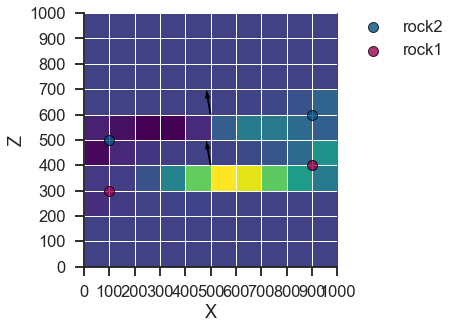

In [35]:
%matplotlib inline
point = 3

gp.plot.plot_section(geo_model, 0,
                     block=jac[:100, point, 2].reshape(geo_model.grid.regular_grid.resolution), show_data=True,
                     cmap='viridis', show_grid=True, norm=None)

Hessian
--------

In [ ]:
%matplotlib inline
point = 0

gp.plot.plot_section(geo_data, 0,
                     block=jac[:100, point, 2].reshape(geo_data.grid.regular_grid.resolution), show_data=True,
                     cmap='viridis', show_grid=True, norm=None)

### Pymc3

Calculate the thickness of formation 2 (By Miguel)

In [141]:
geo_model.solutions.lith_block.shape

(125000,)

In [8]:
#group the pd.dafaframe surface point by id
g = geo_model.surface_points.df.groupby('id')

def thickness(l2, l1):
    #define the location of surface point
    geo_model.modify_surface_points(g.groups[1], Z = l2)
    geo_model.modify_surface_points(g.groups[2], Z = l1)
    #re-run the model to update the grid
    gp.compute_model(geo_model)
    well = geo_model.solutions.lith_block.reshape(geo_model.grid.regular_grid.resolution)[10,1,:]
    #thickness calculated by the grid number * grid height
    thickness = (well == 2).sum()*geo_model.grid.regular_grid.dz
    return thickness


In [188]:
geo_model.solutions.lith_block.reshape(geo_model.grid.regular_grid.resolution)[10,1,:].shape

(50,)

Probability model in Pymc3

In [93]:
import theano.tensor as tt

class MuFromTheta(tt.Op):
    itypes = [tt.dvector]
    otypes = [tt.dscalar]

    def perform(self, node, inputs, outputs):
        theta, = inputs
        mu = thickness(theta[0], theta[1])
        outputs[0][0] = np.array(mu)

        
tt_mu_from_theta = MuFromTheta()


In [94]:
with pm.Model() as model: 
    #define prior
    # r2 > r1
    r2 = pm.Normal('rock2', 600, 50)
    r1 = pm.Normal('rock1', 400, 50)
    theta = tt.as_tensor_variable([r2, r1])
    mu = pm.Deterministic('mu', tt_mu_from_theta(theta))
    #define likelihood
    a = pm.Normal('y', mu=mu, sd=20, observed=[200])
    trace = pm.sample(200, step = pm.Metropolis(), tune=50, cores=1, compute_convergence_checks=False)
    

Only 200 samples in chain.
Sequential sampling (2 chains in 1 job)
CompoundStep
>Metropolis: [rock1]
>Metropolis: [rock2]
100%|██████████| 250/250 [15:13<00:00,  3.60s/it]


/Users/zhouji/anaconda3/envs/Bayes/lib/python3.7/site-packages/gempy/core/solution.py:258: UserWarning: Surfaces not computed due to: marching_cubes_lewiner() got an unexpected keyword argument 'mask'
  warnings.warn('Surfaces not computed due to: ' + str(e))


array([<matplotlib.axes._subplots.AxesSubplot object at 0x1c355dbc18>,
      dtype=object)

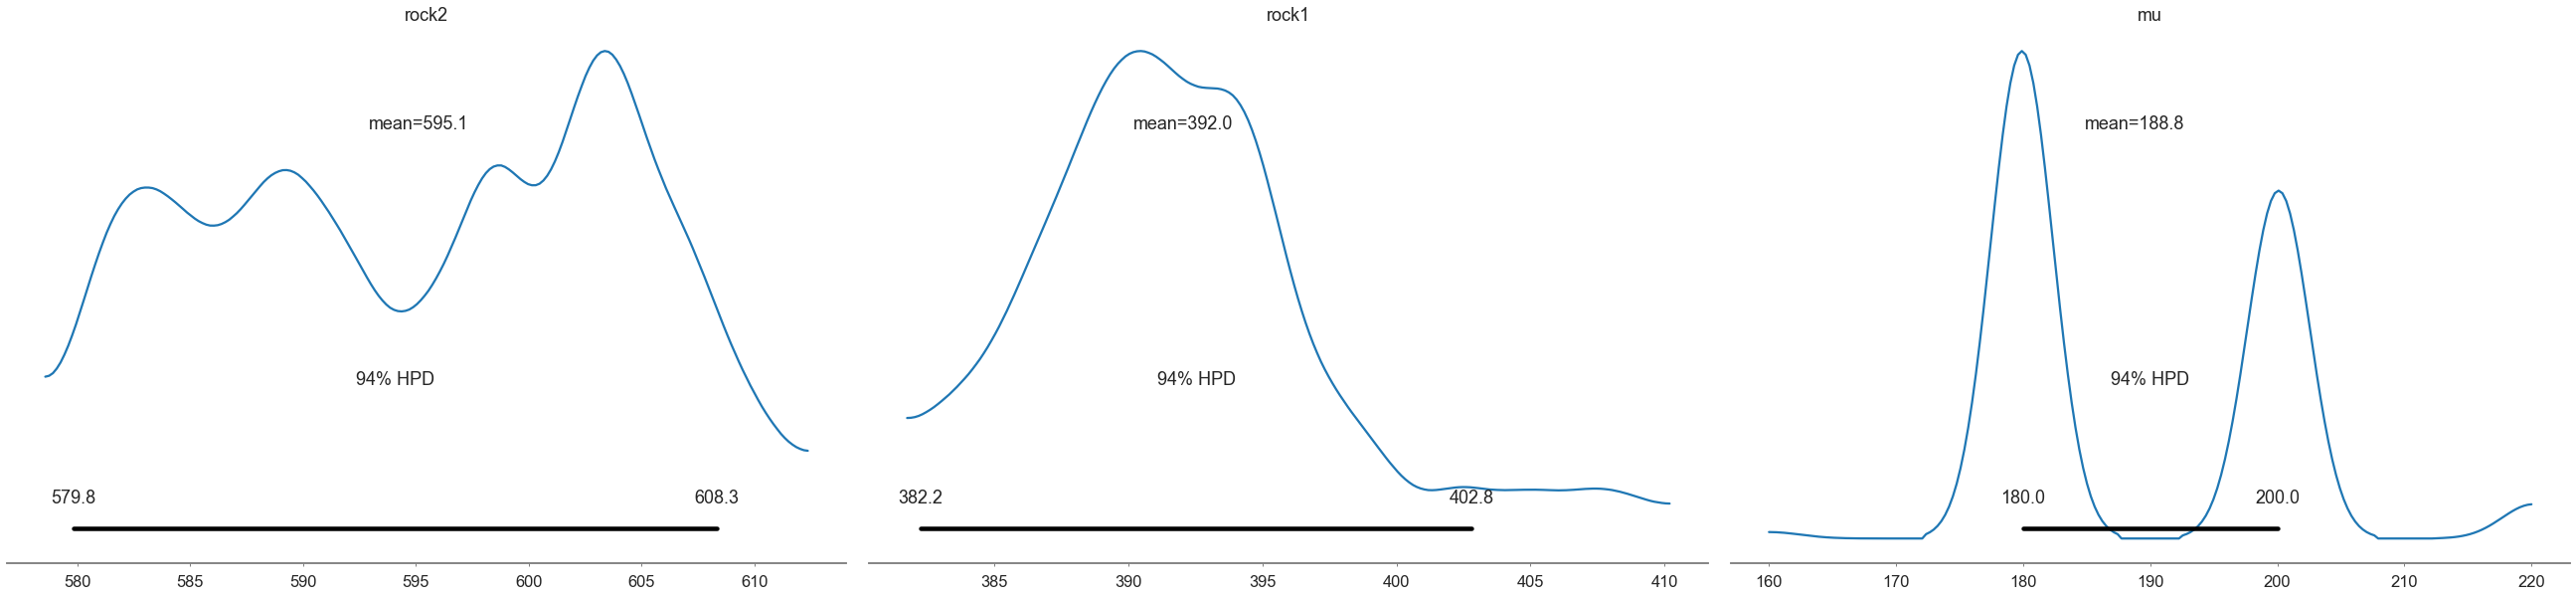

In [95]:
pm.plot_posterior(trace)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1c355c4390>,
      dtype=object)

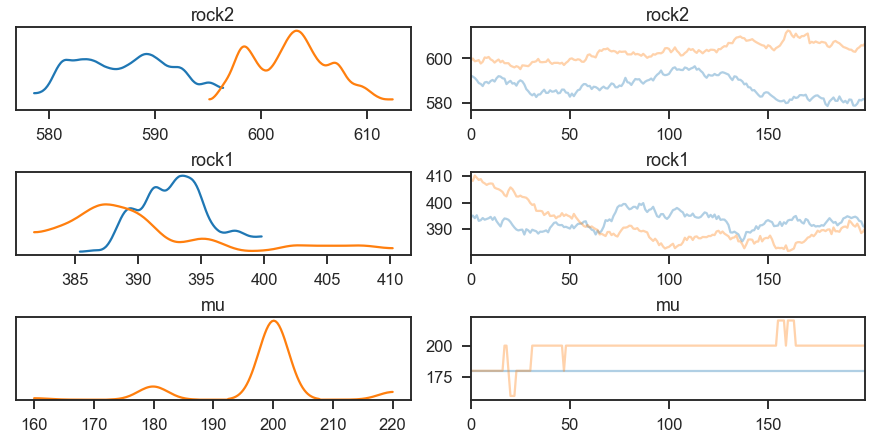

In [96]:
pm.traceplot(trace)

## Compling with Gempy --- Miguel

In [9]:
import theano
theano.config.compute_test_value = 'ignore'

In [10]:
i = geo_model.interpolator.get_python_input_block()

In [11]:
geo_model_T = theano.OpFromGraph(geo_model.interpolator.theano_graph.input_parameters_loop,
                               geo_model.interpolator.theano_graph.compute_series(), inline=False,
                                 on_unused_input='warn',
                               name='geo_model')

In [12]:
rf = geo_model.rescaling.df.loc['values', 'rescaling factor']
centers = geo_model.rescaling.df.loc['values', 'centers']

In [13]:
geo_model.rescaling.df

,rescaling factor,centers
values,1600,"[500.0, 500.0, 500.0]"


In [14]:
# Now we need to change the input of the z of rock 2
# g = geo_model.surface_points.df.groupby('id')
z_rock2 = 700

# change Z of surface_points with id = 1 to rescaled Z_rock2 = 700
i[4][g.groups[1], 2] = (z_rock2 - centers[2]) / rf + 0.5001
i[4][g.groups[2]]

array([[0.2501, 0.3126, 0.4376],
       [0.5001, 0.3126, 0.4376],
       [0.7501, 0.3126, 0.4376],
       [0.2501, 0.6876, 0.4376],
       [0.5001, 0.6876, 0.4376],
       [0.7501, 0.6876, 0.4376]])

In [15]:
import theano
import theano.tensor as tt
theano.config.compute_test_value = 'warn'
# We convert a python variable to theano.shared
input_sh = []
for ii in i:
    input_sh.append(theano.shared(ii))

In [16]:
with pm.Model() as model:
    r2 = pm.Normal('rock2', 600, 50)
    r1 = pm.Normal('rock1', 400, 50)
    #rescale
    val2 = (r2 - centers[2]) / rf + 0.5001
    val1 = (r1 - centers[2]) / rf + 0.5001

    input_sh[4] = tt.set_subtensor(input_sh[4][g.groups[1], 2], val2)
    input_sh[4] = tt.set_subtensor(input_sh[4][g.groups[2], 2], val1)
    
    # we have to take the sol 0
    geo = geo_model_T(*input_sh)[0][0][0:125000]
    well = geo.reshape(geo_model.grid.regular_grid.resolution)[1,1,:]
    thickness = pm.Deterministic('thickness', tt.sum(tt.eq(well, 2)) * geo_model.grid.regular_grid.dz)
    print(tt.sum(tt.eq(well, 2)) * geo_model.grid.regular_grid.dz)
    thickness.name = 'thickness'
    a = pm.Normal('y', mu=thickness, sd=20, observed=120)
    b = pm.Metropolis()
    trace = pm.sample(10000, chains=1,
                     step =b,
                     compute_convergence_checks=True)

/Users/zhouji/anaconda3/envs/Bayes/lib/python3.7/site-packages/theano/gof/op.py:670: UserWarning: theano.function was asked to create a function computing outputs given certain inputs, but the provided input variable at index 5 is not part of the computational graph needed to compute the outputs: Full block matrix for faults or drift. We take 2 times len points for the faultdrift..
To make this warning into an error, you can pass the parameter on_unused_input='raise' to theano.function. To disable it completely, use on_unused_input='ignore'.
  no_recycling=[])


Elemwise{mul,no_inplace}.0


Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [rock1]
>Metropolis: [rock2]
100%|██████████| 10500/10500 [19:07:10<00:00,  3.41s/it]     
Only one chain was sampled, this makes it impossible to run some convergence checks


## Jacobian Try

In [10]:
from theano.gradient import *
import theano
import theano.tensor as tt

In [9]:
gp.set_interpolation_data(geo_model, theano_optimizer='fast_run',
                         compile_theano=False, gradient=True)

In [11]:
gp.set_interpolation_data??